In [1]:
# Load packages
%matplotlib inline

import sys
sys.path.append("..")
import os
from scipy import stats

import scipy.io as sio
import numpy as np
from nilearn import plotting 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
# Code can be found here: https://python-louvain.readthedocs.io/en/latest/api.html #community.best_partition

import statistics
import random
from collections import Counter

# follow permutation method here: https://medium.com/analytics-vidhya/permutation-test-as-an-alternative-to-two-sample-t-test-using-r-9f5da921bc95


### Load data

In [2]:
os.getcwd()

'/Users/bengriffin/git_repos/Dyngraph/dyngraph-pain/Scripts/06-Sex_analyses/05-Distance_metric_analyses'

In [3]:
# Load distance metrics
metric_list = ['Hamming','Jaccard','Spanning tree dissimilarity','Lp-distance','Ipsen-Mikhailov','Hamming-Ipsen-Mikhailov','Polynomial distance','Centrality','Heat spectral wavelet',]
n_metric = 9
d = sio.loadmat('../../../Data/05-Distance_metrics_analyses/Threshold_func_3/d_hamming.mat')
d_hamming = d['d_hamming']
d = sio.loadmat('../../../Data/05-Distance_metrics_analyses/Threshold_func_3/d_jaccard.mat')
d_jaccard = d['d_jaccard']
d = sio.loadmat('../../../Data/05-Distance_metrics_analyses/Threshold_func_3/d_st.mat')
d_st = d['d_st']
d = sio.loadmat('../../../Data/05-Distance_metrics_analyses/Threshold_func_3/d_lp.mat')
d_lp = d['d_lp']
d = sio.loadmat('../../../Data/05-Distance_metrics_analyses/Threshold_func_3/d_IM.mat')
d_IM = d['d_IM']
d = sio.loadmat('../../../Data/05-Distance_metrics_analyses/Threshold_func_3/d_HIM.mat')
d_HIM = d['d_HIM']
d = sio.loadmat('../../../Data/05-Distance_metrics_analyses/Threshold_func_3/d_poli.mat')
d_poli = d['d_poli']
d = sio.loadmat('../../../Data/05-Distance_metrics_analyses/Threshold_func_3/d_centrality.mat')
d_centrality = d['d_centrality']
d = sio.loadmat('../../../Data/05-Distance_metrics_analyses/Threshold_func_3/d_hsw.mat')
d_hsw = d['d_hsw']
print('data shape for 1 metric')
print(d_hamming.shape)


# Combine data
combine_metrics = np.stack((d_hamming, d_jaccard, d_st, d_lp, d_IM, d_HIM, d_poli, d_centrality, d_hsw), axis=4)
print('data shape for all metrics')
print(combine_metrics.shape)
# Split data into male and female
female_all_metrics = combine_metrics[:,:,:,0:15,:]
male_all_metrics = combine_metrics[:,:,:,15:30,:]
print('data shape for one sex all metrics')
print(female_all_metrics.shape)

# Find the mean across the 27 distance measurements for all 30 subjects
female_comp_metrics_mean = female_all_metrics.mean(axis= 3)
male_comp_metrics_mean = male_all_metrics.mean(axis= 3)

print('data shape for mean across sexes')
print(female_comp_metrics_mean.shape)


# Choose which data we are going to compare (e.g. the graphs of distance from time window to to time window t = 2,...,28)
female_comp_metrics = female_comp_metrics_mean[0,1:28,:,:]
male_comp_metrics = male_comp_metrics_mean[0,1:28,:,:]
print('data shape for distance from time window 1 to t = 2,...,28  (for one sex for all metrics)')
print(female_comp_metrics.shape)




data shape for 1 metric
(28, 28, 6, 30)
data shape for all metrics
(28, 28, 6, 30, 9)
data shape for one sex all metrics
(28, 28, 6, 15, 9)
data shape for mean across sexes
(28, 28, 6, 9)
data shape for distance from time window 1 to t = 2,...,28  (for one sex for all metrics)
(27, 6, 9)


### Box plots

In [4]:
print(combine_metrics.shape)
combine_metrics_mean = combine_metrics.mean(axis=3)
print(combine_metrics_mean.shape)
combine_metrics_mean_comp = combine_metrics_mean[0,1:28,:,:]
print(combine_metrics_mean_comp.shape)


(28, 28, 6, 30, 9)
(28, 28, 6, 9)
(27, 6, 9)


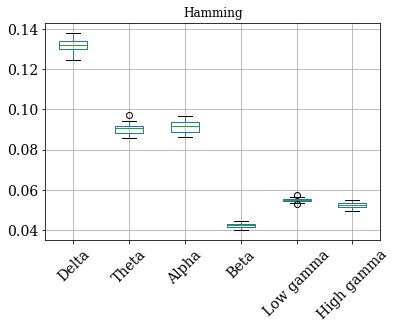

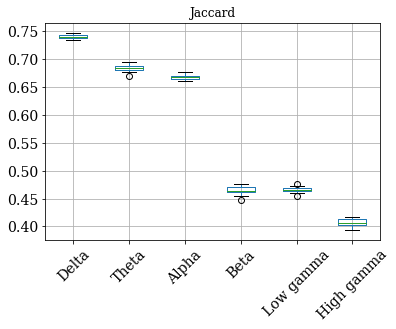

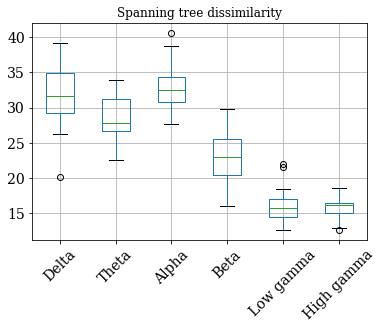

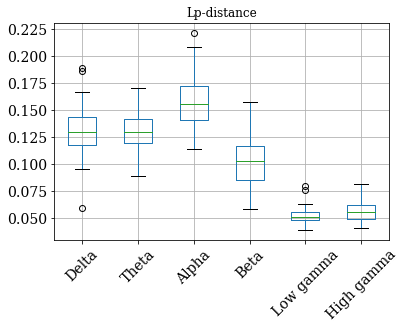

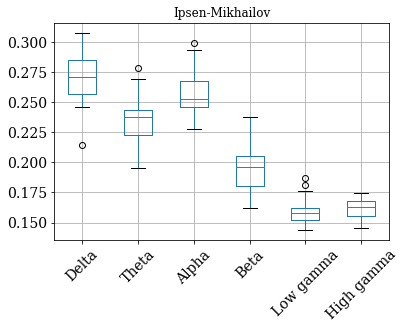

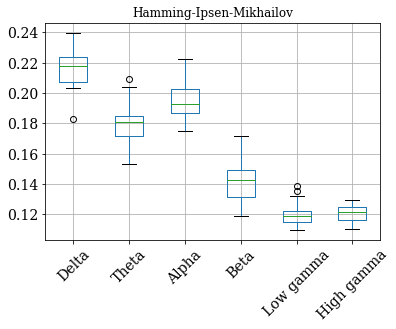

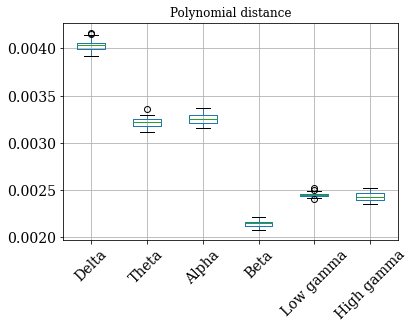

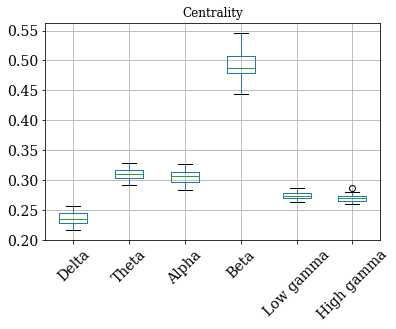

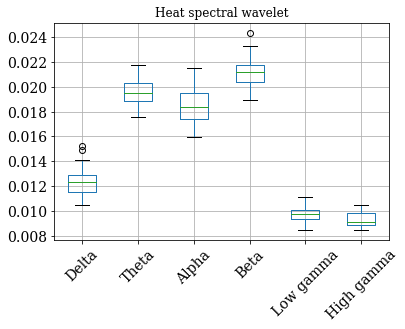

In [5]:
# Plot boxplots for each metric for ALL subjects
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"





for metric in range(n_metric):
    df = pd.DataFrame(combine_metrics_mean_comp[:,:,metric],
                      columns = ['Delta', 'Theta', 'Alpha', 'Beta', 'Low gamma','High gamma'])
    df.plot.box(grid='True', rot=45,fontsize=14)
    plt.title(metric_list[metric])

    
    

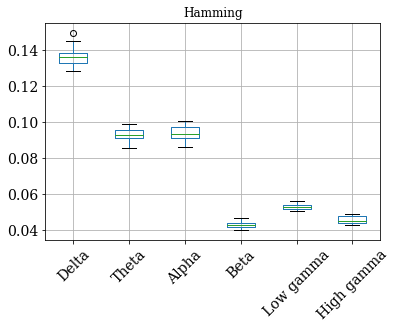

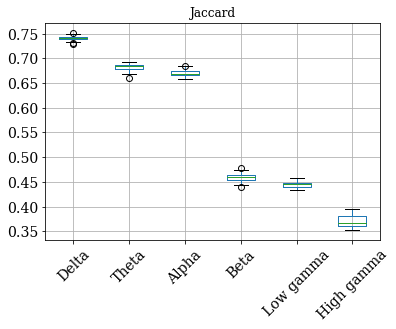

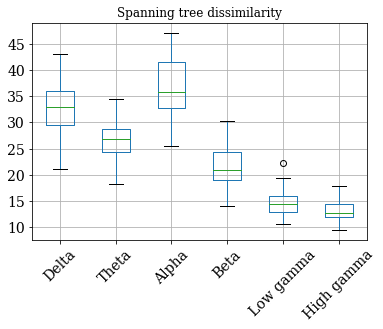

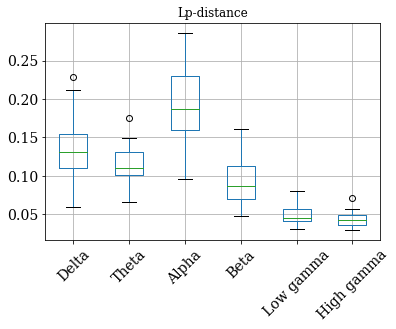

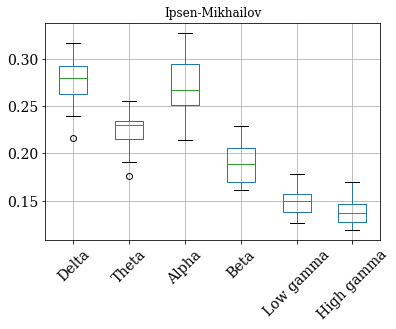

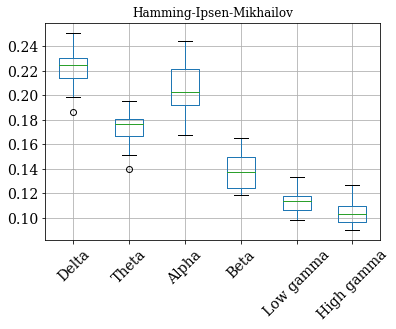

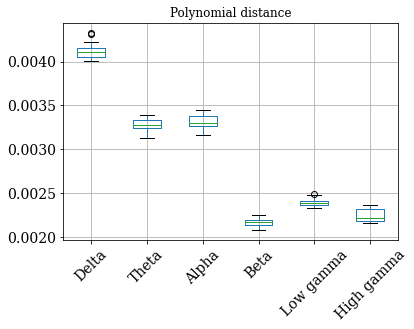

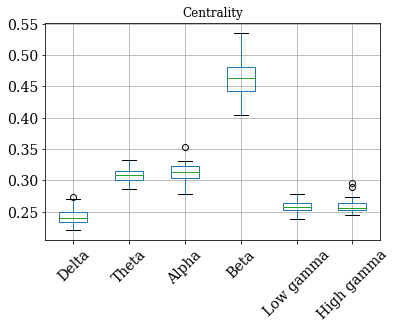

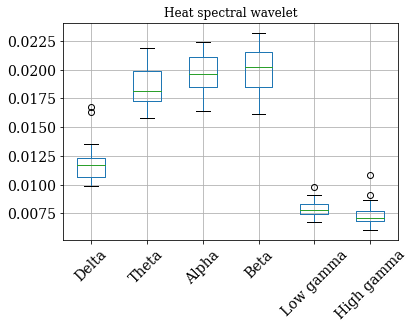

In [6]:
# Plot boxplots for each metric for female
for metric in range(n_metric):
    df = pd.DataFrame(female_comp_metrics[:,:,metric],
                      columns = ['Delta', 'Theta', 'Alpha', 'Beta', 'Low gamma','High gamma'])
    df.plot.box(grid='True', rot=45,fontsize=14)
    plt.title(metric_list[metric])


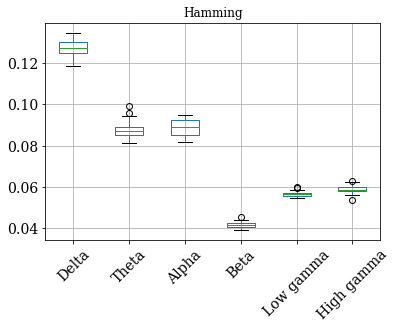

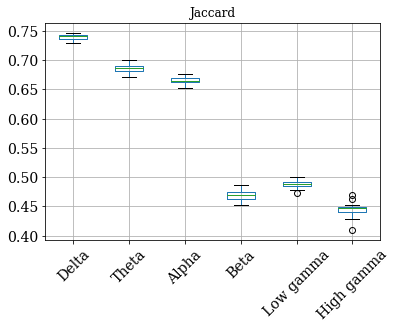

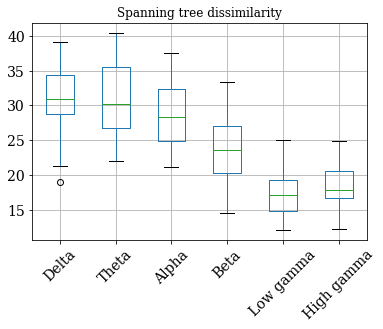

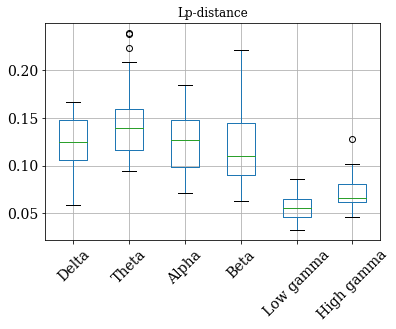

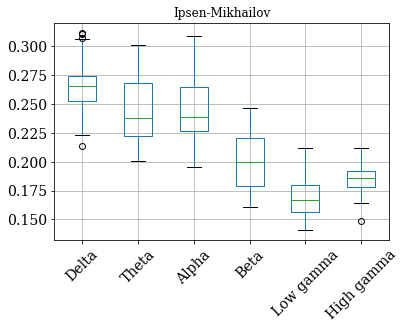

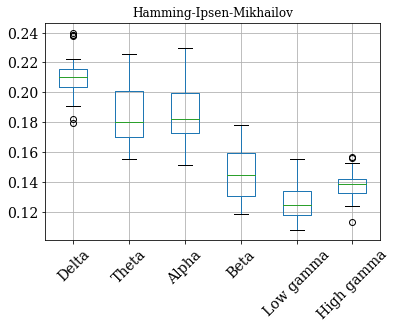

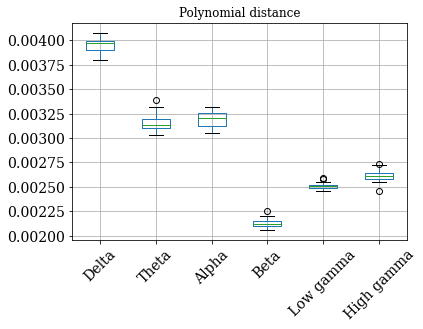

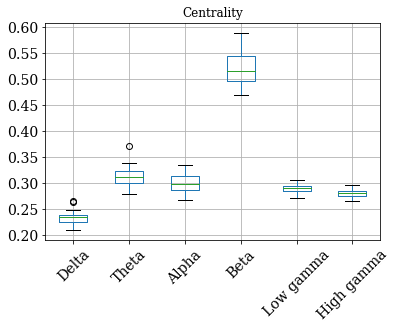

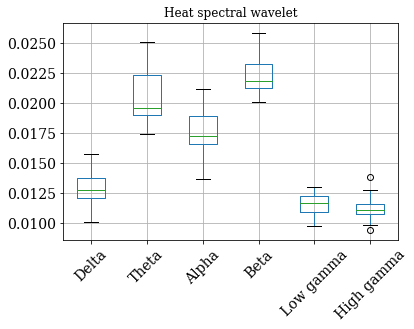

In [7]:
# Plot boxplots for each metric for male
for metric in range(n_metric):
    df = pd.DataFrame(male_comp_metrics[:,:,metric],
                      columns = ['Delta', 'Theta', 'Alpha', 'Beta', 'Low gamma','High gamma'])
    df.plot.box(grid='True', rot=45,fontsize=14)
    plt.title(metric_list[metric])


### Permutation test for female vs male (9 metrics and 6 frequency bands)

In [9]:
# Mean across subjects
f_mean = female_comp_metrics.mean(axis=0)
m_mean = male_comp_metrics.mean(axis=0)
mean_dif = abs(f_mean - m_mean)
print(mean_dif.shape)


(6, 9)


In [10]:
print(female_comp_metrics.shape)
print(mean_dif.shape)
mean_dif_neg = f_mean - m_mean
print(mean_dif_neg.shape)
mean_dif_neg>0

(27, 6, 9)
(6, 9)
(6, 9)


array([[ True,  True,  True,  True,  True,  True,  True,  True, False],
       [ True, False, False, False, False, False,  True, False, False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True, False, False, False, False, False,  True, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False]])

In [8]:
n_perm = 10000
n_freq = 6
null_dist = np.zeros((n_perm,n_freq,n_metric))
p_value = np.zeros((n_freq,n_metric))

n_metric = 9
n_freq = 6


for metric in range(n_metric):
    print(metric)
    for freq in range(n_freq):
        combined_data = np.concatenate((female_comp_metrics[:,freq,metric], male_comp_metrics[:,freq,metric])) # combine the data
        combined_data_copy = combined_data.copy()
        random.seed(123) # set seed for reproducibility

        # Perform randomization 10000 times
        for perm in range(n_perm):
            random.shuffle(combined_data_copy)
            shuffled_female = combined_data_copy[0:27]
            shuffled_male = combined_data_copy[27:54]
            null_dist[perm,freq,metric] = abs(shuffled_female.mean(axis=0) - shuffled_male.mean(axis=0))
    
        # Calc number of permutations that are greater than the mean calculated earlier and divide this by number 
        # of permutations to get the p-values
        p_value[freq,metric] = float((sum(i > mean_dif[freq,metric] for i in null_dist[:,freq,metric]))/n_perm)
    
p_store_bonferri = p_value*54
# Do we need to correct for multiple comparisons so divide by 6 because we are testing 6 frequency bands?
# Yes, if we use a Bonferri correction we simply multiple all p-values by 6
# How do we do a FDR correction?


## The reason we get a p-value of 0 is that if nearly all the female values are greater than nearly all the male values
# Then it is very unlikely for the permutation test to find a bigger absolute value.
# We run a t-test instead to check the results

0
1
2
3
4
5
6
7
8


In [ ]:
#np.set_printoptions(formatter={'float_kind':'{:f}'.format})
#print(p_value)
#print(p_value>0.05)
#print(p_store_bonferri)
#print(p_store_bonferri>0.05)


### T-tests of means

In [11]:
f_mean = female_comp_metrics.mean(axis=0)
m_mean = male_comp_metrics.mean(axis=0)
mean_dif = abs(f_mean - m_mean)
print(mean_dif.shape)

(6, 9)


In [12]:
n_freq = 6
from scipy.stats import ttest_ind, ttest_ind_from_stats

t_store = np.zeros((n_freq,n_metric))
p_store = np.zeros((n_freq,n_metric))

for freq in range(n_freq):
    for metric in range(n_metric):
        a = female_comp_metrics[:,freq,metric]
        b = male_comp_metrics[:,freq,metric]

        t_store[freq,metric], p_store[freq,metric] = ttest_ind(a, b, equal_var=False)


print(t_store)
print(p_store)
print(p_store>0.05)
p_store_bonferri = p_store*54
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
#print(p_store_bonferri)
#print(p_store_bonferri>0.05)


[[  7.56450185   1.75440661   0.99229741   1.20473404   1.69615838
    2.77690749   7.71512161   2.38606488  -2.63691275]
 [  5.35854544  -1.72490397  -3.43419617  -3.58615947  -3.18209642
   -2.69031959   6.11417029  -0.62027827  -3.60279458]
 [  5.30108712   3.1520457    5.94836653   5.98286436   3.76459864
    4.08363854   5.78217363   2.95190605   4.5916853 ]
 [  3.84578986  -4.08416396  -1.3258305   -3.0905499   -1.85867263
   -1.8048415    3.20981598  -6.40122889  -4.62773348]
 [ -8.79982214 -24.24891346  -3.07682024  -1.97620944  -4.74002272
   -4.81780496 -10.59789862 -12.23936755 -15.98952587]
 [-22.54370609 -23.55689845  -7.41041589  -7.21895242 -12.68967183
  -13.35287354 -20.84134631  -7.0701084  -14.28902433]]
[[6.66417801e-10 8.52532409e-02 3.25650159e-01 2.34269099e-01
  9.58451937e-02 7.62828899e-03 3.86493073e-10 2.07292405e-02
  1.10498616e-02]
 [2.25486300e-06 9.05008788e-02 1.29920631e-03 8.48544858e-04
  2.66505150e-03 1.00249602e-02 1.55433635e-07 5.38288438e-01
 

In [13]:
p_store[:,0:5]#.shape

array([[0.000000, 0.085253, 0.325650, 0.234269, 0.095845],
       [0.000002, 0.090501, 0.001299, 0.000849, 0.002665],
       [0.000002, 0.002729, 0.000000, 0.000000, 0.000435],
       [0.000331, 0.000153, 0.190791, 0.003334, 0.068836],
       [0.000000, 0.000000, 0.003378, 0.053459, 0.000018],
       [0.000000, 0.000000, 0.000000, 0.000000, 0.000000]])

### Levene's test of variances

In [14]:
from scipy.stats import levene # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

# Script
n_freq = 6
n_metric = 9

stat_store = np.zeros((n_freq,n_metric))
p_value_store = np.zeros((n_freq,n_metric))

for freq in range(n_freq):
    for metric in range(n_metric):
        x = female_comp_metrics[:,freq,metric]
        y = male_comp_metrics[:,freq,metric]
        stat_store[freq,metric], p_value_store[freq,metric] = levene(x, y)

print(stat_store)
print(p_value_store)
print(p_value_store>0.05)
p_value_store_bonferri = (p_value_store*6)>0.05
#print(p_value_store_bonferri) 
# no significant values under bonferri - whether we use the fact there was 54 (9*6) tests or 6 tests (for freq bands) 
# We haven't tested using FDR test because there is both frequency band and metric to account for?
# I'm not sure how we do that and the results don't seem significant anyway


[[0.012006 0.081535 0.030876 0.943820 0.000913 0.001182 0.002718 0.069572
  0.031031]
 [0.423321 0.044218 4.528937 3.327800 4.569378 4.403181 0.345301 3.766260
  0.752230]
 [0.456261 0.259674 2.041295 4.927479 0.658488 0.742574 0.435752 0.648203
  0.135354]
 [0.232472 0.074269 0.437331 1.540980 0.437351 0.504660 0.129943 0.172651
  0.995971]
 [0.675833 0.204432 1.122847 0.264201 1.118370 1.056959 1.025347 1.131972
  2.093961]
 [2.070996 2.237894 2.473454 3.070317 0.002845 0.013235 4.076374 0.785267
  0.007541]]
[[0.913170 0.776362 0.861201 0.335795 0.976017 0.972710 0.958624 0.793004
  0.860856]
 [0.518149 0.834270 0.038085 0.073866 0.037270 0.040747 0.559328 0.057727
  0.389756]
 [0.502370 0.612500 0.159059 0.030818 0.420793 0.392794 0.512094 0.424422
  0.714438]
 [0.631720 0.786299 0.511333 0.220043 0.511323 0.480634 0.719952 0.679476
  0.322909]
 [0.414779 0.653048 0.294203 0.609426 0.295158 0.308668 0.315943 0.292271
  0.153884]
 [0.156116 0.140709 0.121849 0.085629 0.957665 0.9088

In [15]:
p_value_store[0:6,0:6]#.shape

array([[0.913170, 0.776362, 0.861201, 0.335795, 0.976017, 0.972710],
       [0.518149, 0.834270, 0.038085, 0.073866, 0.037270, 0.040747],
       [0.502370, 0.612500, 0.159059, 0.030818, 0.420793, 0.392794],
       [0.631720, 0.786299, 0.511333, 0.220043, 0.511323, 0.480634],
       [0.414779, 0.653048, 0.294203, 0.609426, 0.295158, 0.308668],
       [0.156116, 0.140709, 0.121849, 0.085629, 0.957665, 0.908854]])

In [16]:
# time window x time window x freq band x subjects x metric
print(combine_metrics.shape)
combine_metrics_mean = combine_metrics.mean(axis=3)
print(combine_metrics_mean.shape)


(28, 28, 6, 30, 9)
(28, 28, 6, 9)


In [17]:
mask_2 = np.zeros((28,28))
mask_2.shape
np.fill_diagonal(mask_2, 1)

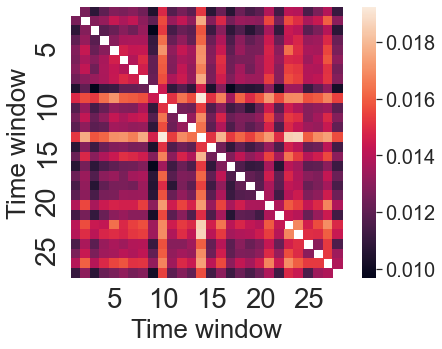

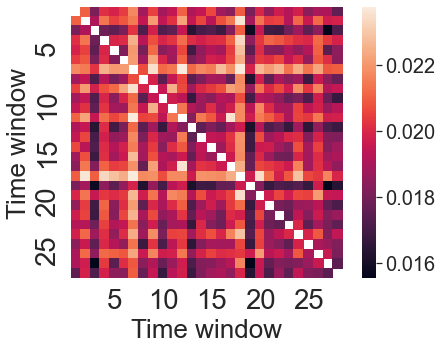

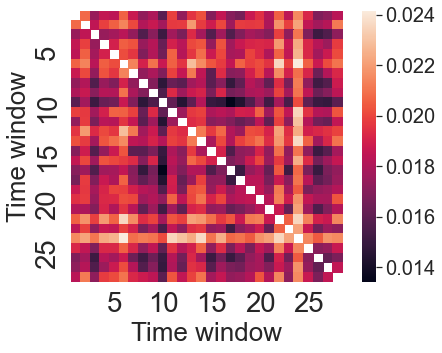

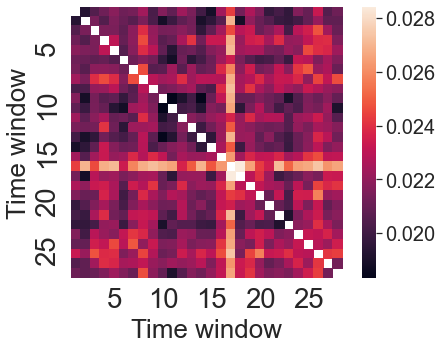

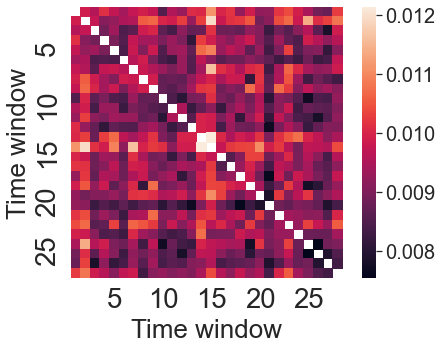

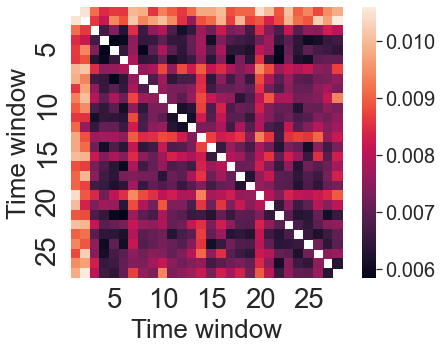

In [18]:
sns.set(font='serif', font_scale=2.5)

x_axis_labels = ['','','','','5','','','','','10','','','','','15','','','','','20','','','','','25','','','']
y_axis_labels = ['','','','','5','','','','','10','','','','','15','','','','','20','','','','','25','','','']

for metric in range(8,9):
    for freq in range(6):
        corr = combine_metrics_mean[:,:,freq,metric]
        #mask = np.zeros_like(corr)
        #mask[np.triu_indices_from(mask)] = True
        with sns.axes_style("white"):
            f, ax = plt.subplots(figsize=(7, 5))
            ax = sns.heatmap(corr, mask=mask_2, square=True,xticklabels=x_axis_labels,yticklabels=y_axis_labels)
            #ax = sns.heatmap(corr, mask=mask, vmax = 0.03, square=True)
            #plt.title(metric_list[metric])
            plt.xlabel('Time window', fontsize =26)
            plt.ylabel('Time window', fontsize =26)
            #plt.setp(ax.get_xticklabels(), fontsize=22, font='serif')
            #plt.setp(ax.get_yticklabels(), fontsize=22)
            cbar = ax.collections[0].colorbar
            cbar.ax.tick_params(labelsize=20)
            